In [1]:
import math

import Objects
import numpy_utils
import Objects_Plotter as sim_plt


gain_matrix = [[-1, 0, 0], [0, 2, 0], [0, 0, 0.5]]
MIMO_charger = Objects.Proportional_object(gain=gain_matrix, sampling_time=0.1)

In [2]:
t0 = 0
t_max = 100

t  = []
u1 = []
u2 = []
u3 = []

for tt in range(t0, t_max+1):
    u1.append(tt*0.1)
    u2.append(10*math.tanh(0.03*tt))
    u3.append(tt**0.5)
    t.append(tt)

In [3]:
from numpy_utils import converters
conv = converters.to_array_converter()

MIMO_charger.reset_history()

u_series = []
for tt in t:
    u_vec = conv.convert_any_type([u1[tt], u2[tt], u3[tt]], vec_type='vertical')
    u_series.append(u_vec)

for input_vector in u_series:
    MIMO_charger.simulate_step(input_vector)

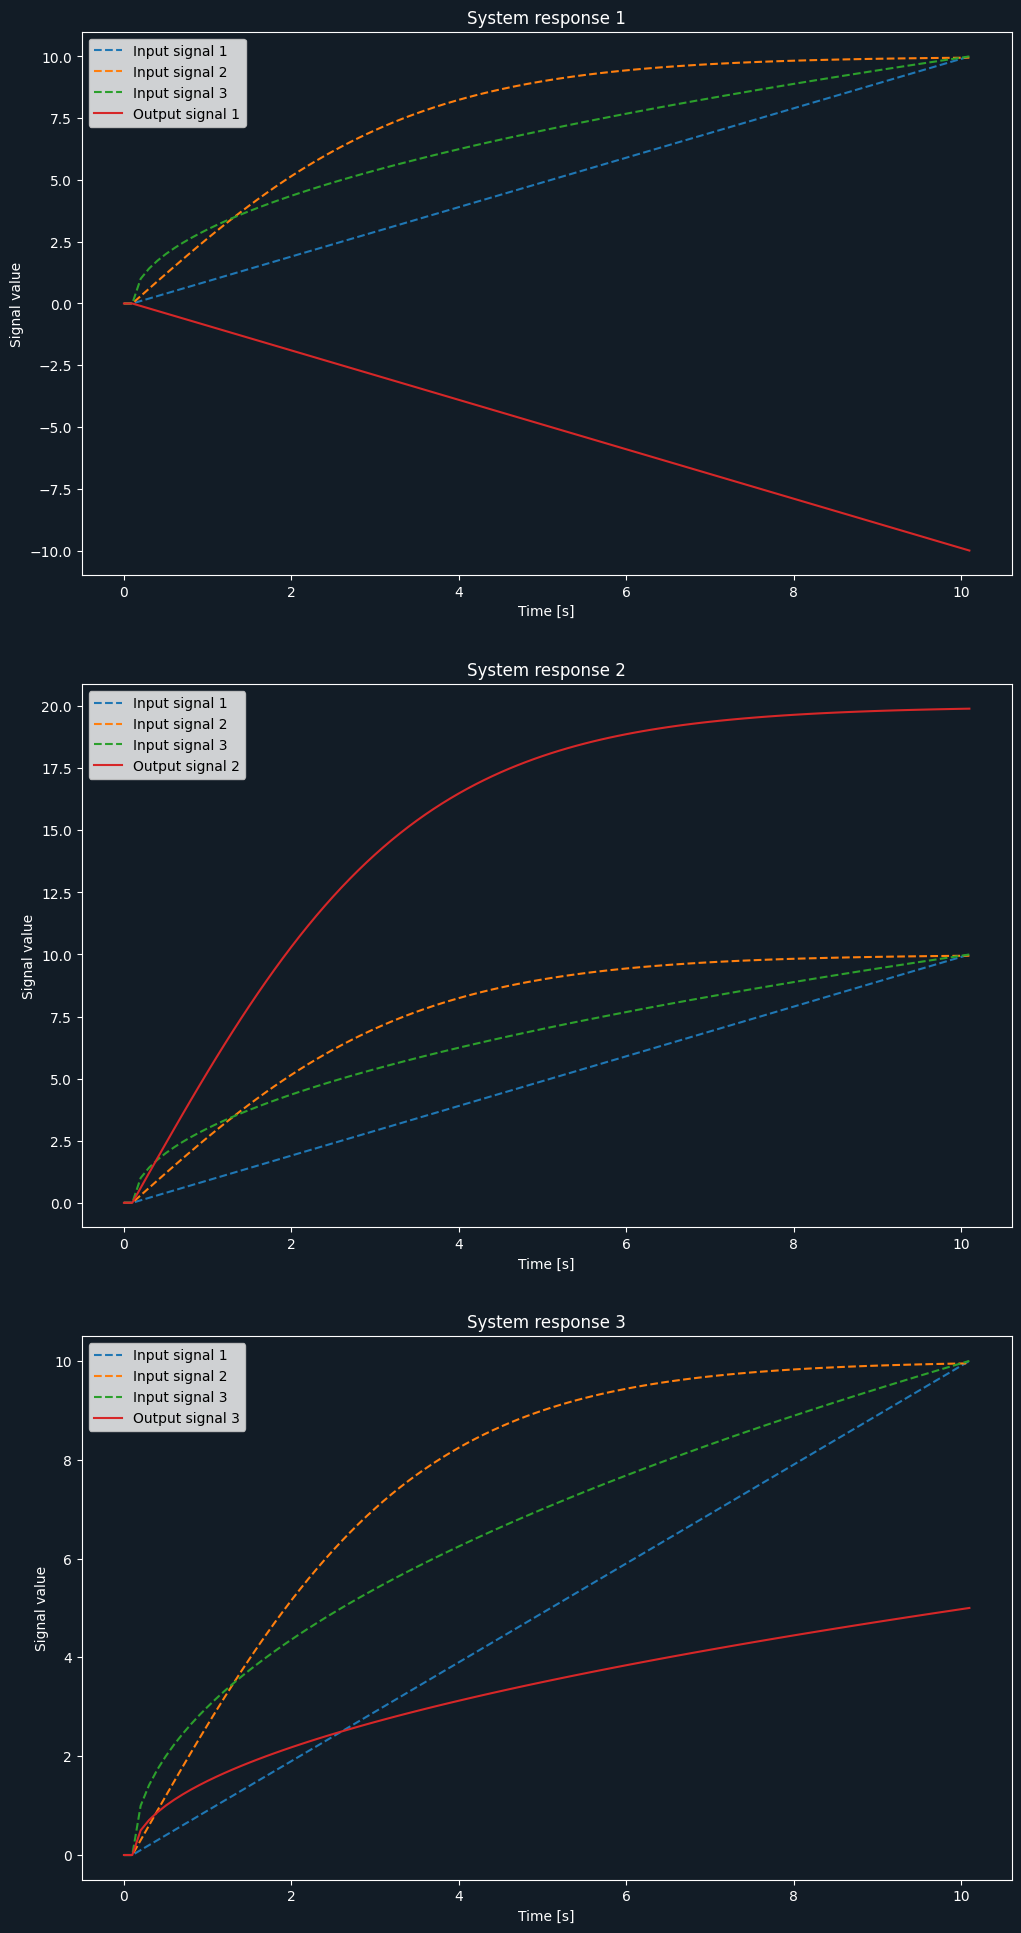

In [4]:
sim_plt.plot_object_history(MIMO_charger, figsize=(12, 24))